## DC Crime data analysis
### Mapping crimes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

from shapely.geometry import box
from shapely.plotting import plot_polygon, plot_points
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=Warning)

Matplotlib created a temporary cache directory at /tmp/matplotlib-e1pwfsng because the default path (/home/sijic/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [5]:
#seting up palette 
palette = ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"]
sns.set(rc={"axes.facecolor":"#e6e6e6","figure.facecolor":"#f5f5f5"})
cmap = colors.ListedColormap( ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"])

In [6]:
# Load the dataset
df = pd.read_csv('./data/crime_dc.csv')
# Display the first 5 rows of the dataset
df.head()

,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,year,offensekey,bid,sector,psa,ucr_rank,block_group,voting_precinct,xblock,block,start_date,ccn,offense,anc,report_date,method,location,latitude
0,cluster 38,violent,7404.0,-76.976591,NaN,HOMICIDE,midnight,7.0,131428.00,8.0,2023,violent|homicide,NaN,7D2,704.0,1,007404 1,precinct 117,402032.00,1800 - 1824 block of frederick douglass place se,2023-02-23 16:24:00,23029603,HOMICIDE,8C,2023-02-24 00:00:00,gun,"38.8506559459,-76.9765909045",38.850656
1,cluster 20,violent,9504.0,-76.993575,2023-06-16 18:53:00,ASSAULT W/DANGEROUS WEAPON,day,4.0,140787.56,5.0,2023,violent|assault w/dangerous weapon,NaN,4D2,405.0,3,009504 1,precinct 68,400557.06,900 - 998 block of michigan avenue ne,2023-06-16 18:29:00,23096959,ASSAULT W/DANGEROUS WEAPON,5B,2023-06-17 11:16:47,others,"38.934972488,-76.9935749549",38.934972
2,cluster 25,property,8410.0,-76.990893,2023-04-13 13:00:00,THEFT/OTHER,midnight,1.0,136927.00,6.0,2023,property|theft/other,NaN,1D2,104.0,6,008410 1,precinct 82,400790.00,1100 - 1199 block of h street ne,2023-04-12 19:30:00,23058339,THEFT/OTHER,6A,2023-04-15 03:15:41,others,"38.900195113,-76.9908927027",38.900195
3,cluster 1,property,3801.0,-77.040824,2023-08-20 22:02:00,THEFT/OTHER,evening,3.0,138822.23,1.0,2023,property|theft/other,adams morgan,3D3,303.0,6,003801 2,precinct 24,396459.65,1731 - 1785 block of florida avenue nw,2023-08-20 21:10:00,23137253,THEFT/OTHER,1C,2023-08-26 21:56:04,others,"38.9172612211,-77.0408237172",38.917261
4,cluster 6,property,10700.0,-77.040859,2023-05-20 15:54:00,THEFT/OTHER,evening,2.0,137483.00,2.0,2023,property|theft/other,golden triangle,2D3,207.0,6,010700 1,precinct 17,396456.00,1130 - 1199 block of connecticut avenue nw,2023-05-20 15:40:00,23079620,THEFT/OTHER,2C,2023-05-20 19:48:30,others,"38.9051969682,-77.0408588935",38.905197


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26091 entries, 0 to 26090
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighborhood_cluster  26091 non-null  object 
 1   offense_group         26091 non-null  object 
 2   census_tract          26080 non-null  float64
 3   longitude             26091 non-null  float64
 4   end_date              24003 non-null  object 
 5   offense_text          26091 non-null  object 
 6   shift                 26091 non-null  object 
 7   district              26091 non-null  float64
 8   yblock                26091 non-null  float64
 9   ward                  26089 non-null  float64
 10  year                  26091 non-null  int64  
 11  offensekey            26091 non-null  object 
 12  bid                   4668 non-null   object 
 13  sector                25946 non-null  object 
 14  psa                   25946 non-null  float64
 15  ucr_rank           

In [8]:
# Check for null values
df.isnull().sum()

neighborhood_cluster        0
offense_group               0
census_tract               11
longitude                   0
end_date                 2088
offense_text                0
shift                       0
district                    0
yblock                      0
ward                        2
year                        0
offensekey                  0
bid                     21423
sector                    145
psa                       145
ucr_rank                    0
block_group                11
voting_precinct             3
xblock                      0
block                       0
start_date                  2
ccn                         0
offense                     0
anc                         2
report_date                 0
method                      0
location                    0
latitude                    0
dtype: int64

In [9]:
df['neighborhood_cluster'].value_counts().sort_index()

neighborhood_cluster
Unknown          2
cluster 1      673
cluster 10     228
cluster 11     286
cluster 12     215
cluster 13     164
cluster 14     252
cluster 15     443
cluster 16     101
cluster 17     729
cluster 18    1141
cluster 19     453
cluster 2     1768
cluster 20     259
cluster 21    1241
cluster 22    1022
cluster 23    1248
cluster 24     410
cluster 25    1879
cluster 26     854
cluster 27     552
cluster 28     230
cluster 29      45
cluster 3     1579
cluster 30     389
cluster 31     605
cluster 32     621
cluster 33     661
cluster 34     771
cluster 35     357
cluster 36     239
cluster 37     323
cluster 38     389
cluster 39    1059
cluster 4      423
cluster 40      17
cluster 41       2
cluster 43      53
cluster 44      25
cluster 45      39
cluster 46       9
cluster 5      312
cluster 6     1080
cluster 7      892
cluster 8     1563
cluster 9      488
Name: count, dtype: int64

In [10]:
df['offense_group'].value_counts().sort_index()

offense_group
property    21976
violent      4115
Name: count, dtype: int64

In [11]:
df['shift'].value_counts().sort_index()

shift
day          9838
evening     10088
midnight     6165
Name: count, dtype: int64

In [12]:
df['district'].value_counts().sort_index()

district
1.0    3480
2.0    4086
3.0    5152
4.0    3214
5.0    4423
6.0    3425
7.0    2311
Name: count, dtype: int64

In [13]:
df['sector'].value_counts().sort_index()

sector
1D1    1012
1D2    1415
1D3    1052
2D1     982
2D2    1024
2D3    2080
3D1    1228
3D2    2087
3D3    1694
4D1    1080
4D2    1090
4D3    1042
5D1    1650
5D2    1531
5D3    1243
6D1    1116
6D2    1208
6D3    1101
7D1     849
7D2     752
7D3     710
Name: count, dtype: int64

In [14]:
df['psa'].value_counts().sort_index()

psa
101.0     487
102.0     233
103.0     292
104.0     592
105.0     202
106.0     850
107.0     477
108.0     346
201.0     173
202.0     285
203.0     524
204.0     415
205.0     188
206.0     421
207.0     706
208.0     805
209.0     569
301.0     425
302.0     799
303.0     631
304.0     429
305.0    1205
306.0     366
307.0     638
308.0     516
401.0     428
402.0     326
403.0     326
404.0     525
405.0     368
406.0     411
407.0     311
408.0     238
409.0     279
501.0     956
502.0     694
503.0     622
504.0     344
505.0     565
506.0     555
507.0     688
601.0     194
602.0     576
603.0     627
604.0     474
605.0     403
606.0     355
607.0     450
608.0     346
701.0     246
702.0     250
703.0     353
704.0     314
705.0     209
706.0     297
707.0     229
708.0     413
Name: count, dtype: int64

In [15]:
df['block'].value_counts().sort_index()

block
0 - 0 block of francis scott key bridge nw    1
0 - 61 block of observatory circle nw         1
1  - 199 block of tuckerman street nw         2
1  - 199 block of webster street nw           2
1  - 30 block of underwood place ne           1
                                             ..
westminster street nw and 10th street nw      1
westminster street nw and 9th street nw       1
wheeler road se and alabama avenue se         1
wheeler road se and mississippi avenue se     1
wheeler road se and southern avenue se        1
Name: count, Length: 7334, dtype: int64

In [16]:
df['offense'].value_counts().sort_index()

offense
ARSON                            9
ASSAULT W/DANGEROUS WEAPON    1110
BURGLARY                       821
HOMICIDE                       214
MOTOR VEHICLE THEFT           5429
ROBBERY                       2668
SEX ABUSE                      123
THEFT F/AUTO                  5880
THEFT/OTHER                   9837
Name: count, dtype: int64

In [17]:
df['method'].value_counts().sort_index()

method
gun        2671
knife       352
others    23068
Name: count, dtype: int64

In [18]:
df['offense_text'].value_counts().sort_index()

offense_text
ARSON                            9
ASSAULT W/DANGEROUS WEAPON    1110
BURGLARY                       821
HOMICIDE                       214
MOTOR VEHICLE THEFT           5429
ROBBERY                       2668
SEX ABUSE                      123
THEFT F/AUTO                  5880
THEFT/OTHER                   9837
Name: count, dtype: int64

In [19]:
## for property type
df[df['offense_group']=='property']['method'].value_counts().sort_index()

method
gun          34
knife        27
others    21915
Name: count, dtype: int64

In [20]:
df[df['offense_group']=='violent']['method'].value_counts().sort_index()

method
gun       2637
knife      325
others    1153
Name: count, dtype: int64

In [21]:
df[df['offense_group']=='property']['offense'].value_counts().sort_index()

offense
ARSON                     9
BURGLARY                821
MOTOR VEHICLE THEFT    5429
THEFT F/AUTO           5880
THEFT/OTHER            9837
Name: count, dtype: int64

In [22]:
df[df['offense_group']=='violent']['offense'].value_counts().sort_index()

offense
ASSAULT W/DANGEROUS WEAPON    1110
HOMICIDE                       214
ROBBERY                       2668
SEX ABUSE                      123
Name: count, dtype: int64

In [23]:
df['offense'].value_counts().index

Index(['THEFT/OTHER', 'THEFT F/AUTO', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE', 'SEX ABUSE',
       'ARSON'],
      dtype='object', name='offense')

In [24]:
df.loc[df['offense']=='ASSAULT W/DANGEROUS WEAPON','offense']='ASSAULT W/WEAPON'
# df.loc[df['offense']=='ASSAULT W/DANGEROUS WEAPON','offense']='ASSAULT W/WEAPON'

In [25]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

df=df[df['start_date'].dt.year>2022]

In [26]:
df.index=pd.RangeIndex(start=0,stop=df.shape[0])
df=df.reset_index()
df

,index,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,year,offensekey,bid,sector,psa,ucr_rank,block_group,voting_precinct,xblock,block,start_date,ccn,offense,anc,report_date,method,location,latitude
0,0,cluster 38,violent,7404.0,-76.976591,NaT,HOMICIDE,midnight,7.0,131428.00,8.0,2023,violent|homicide,NaN,7D2,704.0,1,007404 1,precinct 117,402032.00,1800 - 1824 block of frederick douglass place se,2023-02-23 16:24:00,23029603,HOMICIDE,8C,2023-02-24 00:00:00,gun,"38.8506559459,-76.9765909045",38.850656
1,1,cluster 20,violent,9504.0,-76.993575,2023-06-16 18:53:00,ASSAULT W/DANGEROUS WEAPON,day,4.0,140787.56,5.0,2023,violent|assault w/dangerous weapon,NaN,4D2,405.0,3,009504 1,precinct 68,400557.06,900 - 998 block of michigan avenue ne,2023-06-16 18:29:00,23096959,ASSAULT W/WEAPON,5B,2023-06-17 11:16:47,others,"38.934972488,-76.9935749549",38.934972
2,2,cluster 25,property,8410.0,-76.990893,2023-04-13 13:00:00,THEFT/OTHER,midnight,1.0,136927.00,6.0,2023,property|theft/other,NaN,1D2,104.0,6,008410 1,precinct 82,400790.00,1100 - 1199 block of h street ne,2023-04-12 19:30:00,23058339,THEFT/OTHER,6A,2023-04-15 03:15:41,others,"38.900195113,-76.9908927027",38.900195
3,3,cluster 1,property,3801.0,-77.040824,2023-08-20 22:02:00,THEFT/OTHER,evening,3.0,138822.23,1.0,2023,property|theft/other,adams morgan,3D3,303.0,6,003801 2,precinct 24,396459.65,1731 - 1785 block of florida avenue nw,2023-08-20 21:10:00,23137253,THEFT/OTHER,1C,2023-08-26 21:56:04,others,"38.9172612211,-77.0408237172",38.917261
4,4,cluster 6,property,10700.0,-77.040859,2023-05-20 15:54:00,THEFT/OTHER,evening,2.0,137483.00,2.0,2023,property|theft/other,golden triangle,2D3,207.0,6,010700 1,precinct 17,396456.00,1130 - 1199 block of connecticut avenue nw,2023-05-20 15:40:00,23079620,THEFT/OTHER,2C,2023-05-20 19:48:30,others,"38.9051969682,-77.0408588935",38.905197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25850,25850,cluster 23,property,8802.0,-76.988471,2023-05-13 17:21:00,THEFT/OTHER,day,5.0,137671.00,5.0,2023,property|theft/other,NaN,5D3,506.0,6,008802 4,precinct 77,401000.00,1100 - 1199 block of penn street ne,2023-05-13 17:20:00,23422572,THEFT/OTHER,5D,2023-06-15 10:02:38,others,"38.9068971135,-76.9884706924",38.906897
25851,25851,cluster 24,property,9000.0,-76.960097,2023-08-09 06:45:00,THEFT F/AUTO,day,5.0,140142.00,5.0,2023,property|theft f/auto,NaN,5D2,503.0,7,009000 1,precinct 139,403459.94,2855 - 3200 block of bladensburg road ne,2023-08-08 21:30:00,23130097,THEFT F/AUTO,5C,2023-08-09 11:53:00,others,"38.9291504511,-76.960096837",38.929150
25852,25852,cluster 8,property,4702.0,-77.011543,2023-08-16 09:15:00,THEFT/OTHER,day,1.0,136737.04,6.0,2023,property|theft/other,noma,1D1,102.0,6,004702 1,precinct 1,398998.67,50 - 79 block of massachusetts avenue nw,2023-08-16 09:00:00,23135742,THEFT/OTHER,6E,2023-08-18 08:03:43,others,"38.8984836697,-77.01154328",38.898484
25853,25853,cluster 15,property,1304.0,-77.058081,2023-09-19 18:18:00,THEFT/OTHER,evening,2.0,140772.69,3.0,2023,property|theft/other,NaN,2D1,203.0,6,001304 1,precinct 34,394964.33,3319 - 3499 block of connecticut avenue nw,2023-09-19 18:01:00,23154929,THEFT/OTHER,3C,2023-09-19 19:12:25,others,"38.9348242806,-77.0580805327",38.934824


In [27]:
daily_counts = df['start_date'].dt.date.value_counts().sort_index()
weekly_counts = df['start_date'].dt.to_period('W').value_counts().sort_index()
monthly_counts = df['start_date'].dt.to_period('M').value_counts().sort_index()

In [28]:
df['day_of_week'] = df['start_date'].dt.dayofweek
weekday_counts = df['day_of_week'].value_counts().sort_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day_of_month'] = df['start_date'].dt.day
day_counts = df['day_of_month'].value_counts().sort_index()

df['hour'] = df['start_date'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

In [29]:
df['month']=df['start_date'].dt.to_period('M')

# other DC data

In [30]:
import geopandas as gpd

metro_lines = gpd.read_file('./data/dc-maps/maps/metro-lines.geojson')
atm = gpd.read_file('./data/dc-maps/maps/atm-banking.geojson')
banks = gpd.read_file('./data/dc-maps/maps/bank-locations.geojson')
gas = gpd.read_file('./data/dc-maps/maps/gas-stations.geojson')
hospitals = gpd.read_file('./data/dc-maps/maps/hospitals.geojson')
# benches = gpd.read_file('./data/dc-maps/maps/benches.geojson') # toomany
dc_boundary = gpd.read_file('./data/dc-maps/maps/dc-boundary.geojson')
district = gpd.read_file('./data/dc-maps/maps/district-mask.geojson')
libraries = gpd.read_file('./data/dc-maps/maps/libraries.geojson')
metro_stations=gpd.read_file('./data/dc-maps/maps/metro-station-entrances-district.geojson')
parks = gpd.read_file('./data/dc-maps/maps/national-parks.geojson')
museums = gpd.read_file('./data/dc-maps/maps/museums-in-dc.geojson')
police_stations = gpd.read_file('./data/dc-maps/maps/police-stations.geojson')
shuttle_bus = gpd.read_file('./data/dc-maps/maps/shuttle-bus-stops.geojson')
shopping_centers = gpd.read_file('./data/dc-maps/maps/shopping-centers.geojson')
camera = gpd.read_file('./data/dc-maps/maps/camera-enforcement-locations.geojson')
grocery=gpd.read_file('./data/dc-maps/maps/grocery-store-locations.geojson')
metro_bus = gpd.read_file('./data/dc-maps/maps/metro-bus-stops.geojson')
post_office = gpd.read_file('./data/dc-maps/maps/post-offices.geojson')
schools = gpd.read_file('./data/dc-maps/maps/public-schools.geojson')

In [43]:
def fishnet(geometry, step=0.01):
    bounds = geometry.bounds
    xmin,ymin,xmax,ymax=bounds
    result = []
    for i in np.arange(xmin, xmax, step):
        for j in np.arange(ymin, ymax, step):
            b = box(i, j, i+step, j+step)
            g = geometry.intersection(b)
            if g.is_empty:
                continue
            result.append(g)
    return result

# make crime_data a geopanda frame
df['geometry'] = gpd.points_from_xy(df['longitude'], df['latitude'])
crime_data = gpd.GeoDataFrame(df, crs="EPSG:4326")


polygon=dc_boundary['geometry'][0]
res=fishnet(polygon, 0.005)
nets=gpd.GeoDataFrame(geometry=res)
nets['index']=range(len(nets))

In [32]:
def count_close_building(crime_data, buildings, new_col_name='counts', max_distance=0.002):
    data=crime_data
    temp=data[['index','geometry']]
    buildings_location=buildings[['geometry']]

    # Find events within the buffered_museums
    # 1 degree is approximately 111 km;
    temp_buffered = gpd.sjoin_nearest( temp, buildings_location, how='left',max_distance=max_distance,distance_col='distance')
    temp_buffered=temp_buffered[~temp_buffered['index_right'].isnull()]

    counts=pd.DataFrame(temp_buffered.groupby('index').size().rename(new_col_name))

    temp_merged=temp.merge(counts,left_on='index', right_on='index', how='left').fillna(0)

    return temp_merged


In [33]:
temp=count_close_building(crime_data,museums,'museums_count')
crime_data.loc[:,'museums_count']=temp.loc[:,'museums_count']

col_name='gas'
temp=count_close_building(crime_data,gas,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='metro_bus'
temp=count_close_building(crime_data,metro_bus,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='atm'
temp=count_close_building(crime_data,atm,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='banks'
temp=count_close_building(crime_data,banks,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='grocery'
temp=count_close_building(crime_data,grocery,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='metro_stations'
temp=count_close_building(crime_data,metro_stations,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='post_office'
temp=count_close_building(crime_data,post_office,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='schools'
temp=count_close_building(crime_data,schools,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='libraries'
temp=count_close_building(crime_data,libraries,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='shuttle_bus'
temp=count_close_building(crime_data,shuttle_bus,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]



In [34]:
# PCA on the lat and lon to get 1d
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
crime_data['PCA_location']=pca.fit_transform(crime_data[['longitude','latitude']])

In [35]:
crime_data.columns

Index(['index', 'neighborhood_cluster', 'offense_group', 'census_tract',
       'longitude', 'end_date', 'offense_text', 'shift', 'district', 'yblock',
       'ward', 'year', 'offensekey', 'bid', 'sector', 'psa', 'ucr_rank',
       'block_group', 'voting_precinct', 'xblock', 'block', 'start_date',
       'ccn', 'offense', 'anc', 'report_date', 'method', 'location',
       'latitude', 'day_of_week', 'day_of_month', 'hour', 'month', 'geometry',
       'museums_count', 'gas', 'metro_bus', 'atm', 'banks', 'grocery',
       'metro_stations', 'post_office', 'schools', 'libraries', 'shuttle_bus',
       'PCA_location'],
      dtype='object')

In [36]:
# filter by the offense type
theft_other=crime_data[crime_data['offense']=='THEFT/OTHER']
theft_auto=crime_data[crime_data['offense']=='THEFT F/AUTO']
theft_v=crime_data[crime_data['offense']=='MOTOR VEHICLE THEFT']
robbery=crime_data[crime_data['offense']=='ROBBERY']
assault=crime_data[crime_data['offense']=='ASSAULT W/WEAPON']
burglary=crime_data[crime_data['offense']=='BURGLARY']
homicide=crime_data[crime_data['offense']=='HOMICIDE']
sexabuse=crime_data[crime_data['offense']=='SEX ABUSE']
arson=crime_data[crime_data['offense']=='ARSON']

In [37]:
# filter by methods: gun, knife, others
gun=crime_data[crime_data['method']=='gun']
knife=crime_data[crime_data['method']=='knife']
methods_others=crime_data[crime_data['method']=='others']

In [38]:
crime_data

,index,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,year,offensekey,bid,sector,psa,ucr_rank,block_group,voting_precinct,xblock,block,start_date,ccn,offense,anc,report_date,method,location,latitude,day_of_week,day_of_month,hour,month,geometry,museums_count,gas,metro_bus,atm,banks,grocery,metro_stations,post_office,schools,libraries,shuttle_bus,PCA_location
0,0,cluster 38,violent,7404.0,-76.976591,NaT,HOMICIDE,midnight,7.0,131428.00,8.0,2023,violent|homicide,NaN,7D2,704.0,1,007404 1,precinct 117,402032.00,1800 - 1824 block of frederick douglass place se,2023-02-23 16:24:00,23029603,HOMICIDE,8C,2023-02-24 00:00:00,gun,"38.8506559459,-76.9765909045",38.850656,3,23,16,2023-02,POINT (-76.97659 38.85066),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058103
1,1,cluster 20,violent,9504.0,-76.993575,2023-06-16 18:53:00,ASSAULT W/DANGEROUS WEAPON,day,4.0,140787.56,5.0,2023,violent|assault w/dangerous weapon,NaN,4D2,405.0,3,009504 1,precinct 68,400557.06,900 - 998 block of michigan avenue ne,2023-06-16 18:29:00,23096959,ASSAULT W/WEAPON,5B,2023-06-17 11:16:47,others,"38.934972488,-76.9935749549",38.934972,4,16,18,2023-06,POINT (-76.99357 38.93497),0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.006194
2,2,cluster 25,property,8410.0,-76.990893,2023-04-13 13:00:00,THEFT/OTHER,midnight,1.0,136927.00,6.0,2023,property|theft/other,NaN,1D2,104.0,6,008410 1,precinct 82,400790.00,1100 - 1199 block of h street ne,2023-04-12 19:30:00,23058339,THEFT/OTHER,6A,2023-04-15 03:15:41,others,"38.900195113,-76.9908927027",38.900195,2,12,19,2023-04,POINT (-76.99089 38.90020),0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.016873
3,3,cluster 1,property,3801.0,-77.040824,2023-08-20 22:02:00,THEFT/OTHER,evening,3.0,138822.23,1.0,2023,property|theft/other,adams morgan,3D3,303.0,6,003801 2,precinct 24,396459.65,1731 - 1785 block of florida avenue nw,2023-08-20 21:10:00,23137253,THEFT/OTHER,1C,2023-08-26 21:56:04,others,"38.9172612211,-77.0408237172",38.917261,6,20,21,2023-08,POINT (-77.04082 38.91726),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.033277
4,4,cluster 6,property,10700.0,-77.040859,2023-05-20 15:54:00,THEFT/OTHER,evening,2.0,137483.00,2.0,2023,property|theft/other,golden triangle,2D3,207.0,6,010700 1,precinct 17,396456.00,1130 - 1199 block of connecticut avenue nw,2023-05-20 15:40:00,23079620,THEFT/OTHER,2C,2023-05-20 19:48:30,others,"38.9051969682,-77.0408588935",38.905197,5,20,15,2023-05,POINT (-77.04086 38.90520),0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.026046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25850,25850,cluster 23,property,8802.0,-76.988471,2023-05-13 17:21:00,THEFT/OTHER,day,5.0,137671.00,5.0,2023,property|theft/other,NaN,5D3,506.0,6,008802 4,precinct 77,401000.00,1100 - 1199 block of penn street ne,2023-05-13 17:20:00,23422572,THEFT/OTHER,5D,2023-06-15 10:02:38,others,"38.9068971135,-76.9884706924",38.906897,5,13,17,2023-05,POINT (-76.98847 38.90690),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.014775
25851,25851,cluster 24,property,9000.0,-76.960097,2023-08-09 06:45:00,THEFT F/AUTO,day,5.0,140142.00,5.0,2023,property|theft f/auto,NaN,5D2,503.0,7,009000 1,precinct 139,403459.94,2855 - 3200 block of bladensburg road ne,2023-08-08 21:30:00,23130097,THEFT F/AUTO,5C,2023-08-09 11:53:00,others,"38.9291504511,-76.960096837",38.929150,1,8,21,2023-08,POINT (-76.96010 38.92915),0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.024049
25852,25852,cluster 8,property,4702.0,-77.011543,2023-08-16 09:15:00,THEFT/OTHER,day,1.0,136737.04,6.0,2023,property|theft/other,noma,1D1,102.0,6,004702 1,precinct 1,398998.67,50 - 79 block of massachusetts avenue nw,2023-08-16 09:00:00,23135742,THEFT/OTHER,6E,2023-08-18 08:03:43,others,"38.8984836697,-77.01154328",38.898484,2,16,9,2023-08,POINT (-77.01154 38.89848),0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0

In [39]:
knife['offense_group'].value_counts(normalize=True)

offense_group
violent     0.923295
property    0.076705
Name: proportion, dtype: float64

In [40]:
theft_v['method'].value_counts(normalize=True)

method
others    0.999261
gun       0.000739
Name: proportion, dtype: float64

In [38]:
gun['offense'].value_counts(normalize=True)

offense
ROBBERY                0.646154
ASSAULT W/WEAPON       0.270544
HOMICIDE               0.067542
THEFT/OTHER            0.007880
SEX ABUSE              0.003002
BURGLARY               0.001876
MOTOR VEHICLE THEFT    0.001501
THEFT F/AUTO           0.001501
Name: proportion, dtype: float64

## Clusters

In [45]:
# get the Jan data
jan_crimes=crime_data[crime_data['month']=='2023-01']
jan_crimes

,index,neighborhood_cluster,offense_group,census_tract,longitude,end_date,offense_text,shift,district,yblock,ward,year,offensekey,bid,sector,psa,ucr_rank,block_group,voting_precinct,xblock,block,start_date,ccn,offense,anc,report_date,method,location,latitude,day_of_week,day_of_month,hour,month,geometry
5,5,cluster 3,violent,4402.0,-77.028089,2023-01-22 03:30:00,ROBBERY,midnight,3.0,138713.0,1.0,2023,violent|robbery,NaN,3D2,305.0,4,004402 1,precinct 22,397564.0,1900 - 1999 block of 12th street nw,2023-01-22 03:20:00,23011475,ROBBERY,1B,2023-01-22 04:14:54,gun,"38.9162809962,-77.0280890891",38.916281,6,22,3,2023-01,POINT (-77.02809 38.91628)
12,12,cluster 3,property,4402.0,-77.027570,2023-01-13 00:30:00,THEFT F/AUTO,day,3.0,138792.0,1.0,2023,property|theft f/auto,NaN,3D2,305.0,7,004402 1,precinct 22,397609.0,1100 - 1199 block of u street nw,2023-01-12 23:30:00,23012576,THEFT F/AUTO,1B,2023-01-24 13:23:21,others,"38.9169927779,-77.0275704771",38.916993,3,12,23,2023-01,POINT (-77.02757 38.91699)
30,30,cluster 1,property,3801.0,-77.040831,2023-01-02 13:30:00,THEFT/OTHER,day,3.0,138822.0,1.0,2023,property|theft/other,adams morgan,3D3,303.0,6,003801 2,precinct 24,396459.0,1731 - 1785 block of florida avenue nw,2023-01-02 13:26:00,23000818,THEFT/OTHER,1C,2023-01-02 14:02:20,others,"38.9172591466,-77.0408312112",38.917259,0,2,13,2023-01,POINT (-77.04083 38.91726)
39,39,cluster 25,property,10601.0,-77.005891,2023-01-24 20:16:00,MOTOR VEHICLE THEFT,evening,5.0,137576.0,6.0,2023,property|motor vehicle theft,noma,5D1,501.0,8,010601 2,precinct 144,399489.0,1200 - 1229 block of 1st street ne,2023-01-24 19:39:00,23012922,MOTOR VEHICLE THEFT,6E,2023-01-24 20:41:13,others,"38.9060417408,-77.0058914055",38.906042,1,24,19,2023-01,POINT (-77.00589 38.90604)
49,49,cluster 8,property,5802.0,-77.023978,2023-01-22 23:45:00,THEFT F/AUTO,day,1.0,136540.0,2.0,2023,property|theft f/auto,downtown,1D1,101.0,7,005802 5,precinct 129,397920.0,500 - 599 block of 9th street nw,2023-01-22 19:33:00,23012092,THEFT F/AUTO,2C,2023-01-23 14:04:12,others,"38.8967067715,-77.0239775344",38.896707,6,22,19,2023-01,POINT (-77.02398 38.89671)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25804,25804,cluster 1,property,3801.0,-77.040831,2023-01-04 19:21:00,THEFT/OTHER,midnight,3.0,138822.0,1.0,2023,property|theft/other,adams morgan,3D3,303.0,6,003801 2,precinct 24,396459.0,1731 - 1785 block of florida avenue nw,2023-01-04 17:40:00,23002133,THEFT/OTHER,1C,2023-01-04 23:54:03,others,"38.9172591466,-77.0408312112",38.917259,2,4,17,2023-01,POINT (-77.04083 38.91726)
25805,25805,cluster 2,property,2900.0,-77.032734,2023-01-11 17:38:00,THEFT/OTHER,evening,4.0,140976.0,1.0,2023,property|theft/other,NaN,4D3,408.0,6,002900 2,precinct 41,397162.0,3600 - 3699 block of 14th street nw,2023-01-11 15:34:00,23005908,THEFT/OTHER,1A,2023-01-11 18:05:09,others,"38.9366656049,-77.032733837",38.936666,2,11,15,2023-01,POINT (-77.03273 38.93667)
25806,25806,cluster 3,property,3400.0,-77.016213,2023-01-12 09:55:00,THEFT/OTHER,day,3.0,138960.0,1.0,2023,property|theft/other,NaN,3D2,306.0,6,003400 1,precinct 20,398594.0,200 - 399 block of v street nw,2023-01-12 09:46:00,23006215,THEFT/OTHER,1B,2023-01-12 10:37:00,others,"38.918508305,-77.0162128458",38.918508,3,12,9,2023-01,POINT (-77.01621 38.91851)
25819,25819,cluster 25,property,8001.0,-76.988796,2023-01-11 11:23:00,THEFT/OTHER,evening,1.0,136192.0,6.0,2023,property|theft/other,NaN,1D2,108.0,6,008001 3,precinct 81,400972.0,1226 - 1299 block of c street ne,2023-01-11 11:21:00,23420397,THEFT/OTHER,6A,2023-02-01 15:52:29,others,"38.8935737835,-76.9887956059",38.893574,2,11,11,2023-01,POINT (-76.98880 38.89357)


<Axes: >

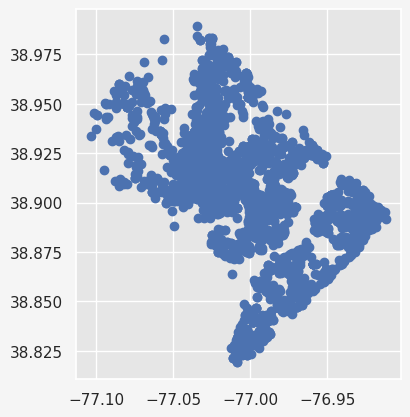

In [46]:
jan_crimes.plot()

# KMeans

In [41]:
# k-means
from sklearn.cluster import KMeans


0.4476195654983574
0.41863711999679415
0.4252475959275061
0.41764808506344764


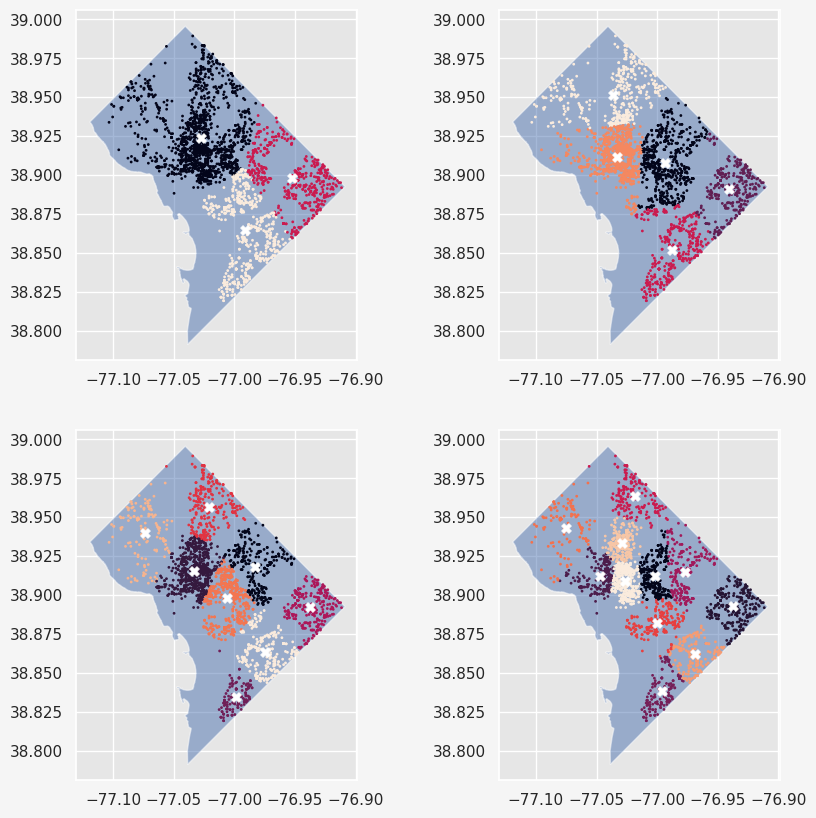

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = np.ravel(axs)
i=0
for cluster in [3,5,8,11]:
    estimator=KMeans(n_clusters=cluster)
    pred=estimator.fit_predict(jan_crimes[['longitude','latitude']])
    centroids=estimator.cluster_centers_
    score=silhouette_score(jan_crimes[['longitude','latitude']], pred)
    print(score)
    dc_boundary.plot(alpha=0.5,ax=axs[i])
    axs[i].scatter(jan_crimes['longitude'], jan_crimes['latitude'],c=estimator.labels_,s=1)
    axs[i].scatter(centroids[:,0], centroids[:,1], marker='X', s=50, linewidths=0.5,color='w')
    i=i+1
plt.savefig('./k-means.png',dpi=300, bbox_inches='tight')

0.4475918978867347


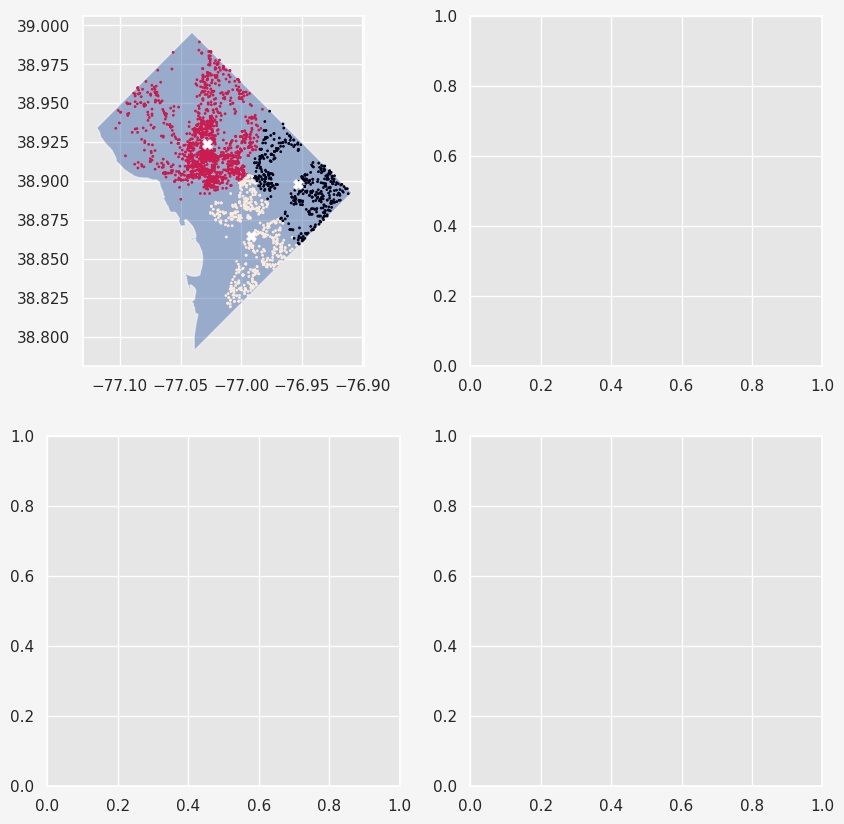

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = np.ravel(axs)
from sklearn.metrics import silhouette_score
i=0
for cluster in [3]:
    estimator=KMeans(n_clusters=cluster)
    pred=estimator.fit_predict(jan_crimes[['longitude','latitude']])
    centroids=estimator.cluster_centers_
    score=silhouette_score(jan_crimes[['longitude','latitude']], pred)
    print(score)
    dc_boundary.plot(alpha=0.5,ax=axs[i])
    axs[i].scatter(jan_crimes['longitude'], jan_crimes['latitude'],c=estimator.labels_,s=1)
    axs[i].scatter(centroids[:,0], centroids[:,1], marker='X', s=50, linewidths=0.5,color='w')
    i=i+1


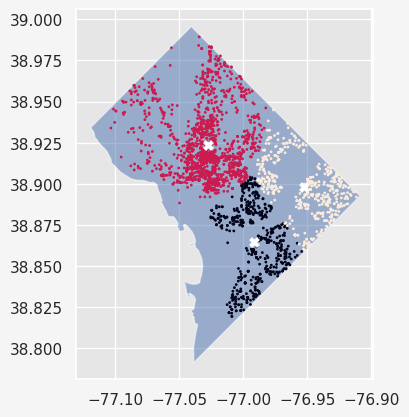

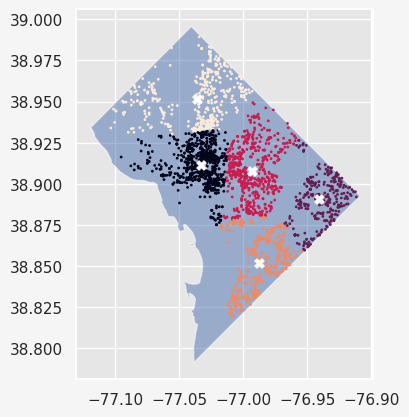

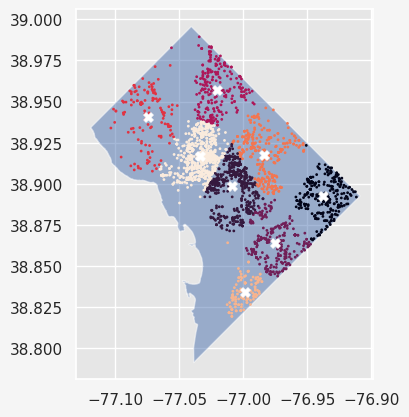

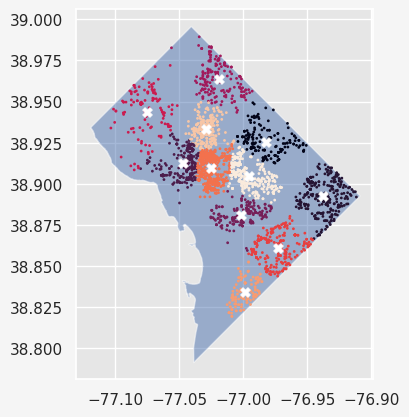

In [42]:
for cluster in [3,5,8,11]:
    estimator=KMeans(n_clusters=cluster)
    estimator.fit(jan_crimes[['longitude','latitude']])
    centroids=estimator.cluster_centers_
    dc_boundary.plot(alpha=0.5)
    plt.scatter(jan_crimes['longitude'], jan_crimes['latitude'],c=estimator.labels_,s=1)
    plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=50, linewidths=0.5,color='w')
    plt.show()

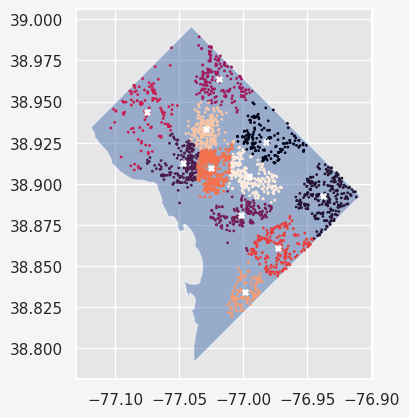

In [43]:
centroids=estimator.cluster_centers_

dc_boundary.plot(alpha=0.5)
plt.scatter(jan_crimes['longitude'], jan_crimes['latitude'],c=estimator.labels_,s=1)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=20, linewidths=0.5,color='w')
plt.show()

 ## Kernel density estimation

In [44]:
from sklearn.neighbors import KernelDensity

In [45]:
kde=KernelDensity(kernel="gaussian", bandwidth=0.001)

In [46]:
kde.fit(jan_crimes[['PCA_location']])
z = kde.score_samples(jan_crimes[['PCA_location']])

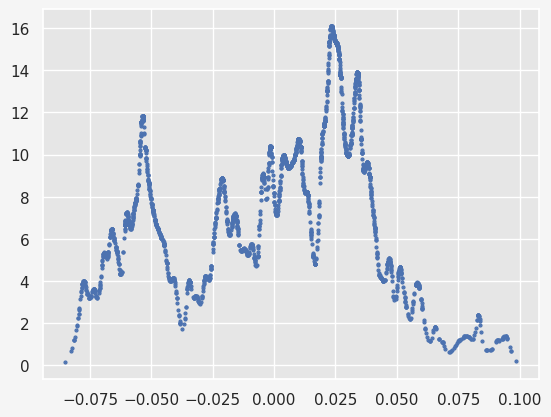

In [47]:
plt.scatter(jan_crimes[['PCA_location']],np.exp(z),lw=2,s=1)

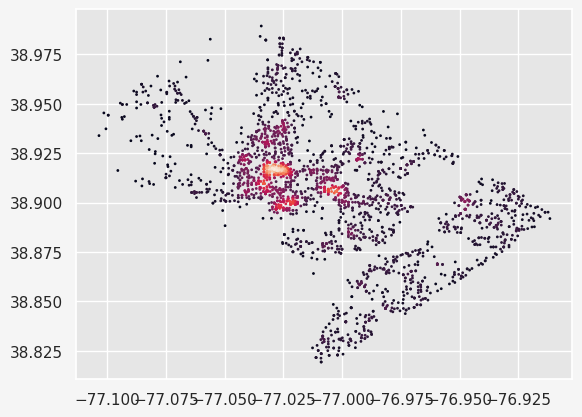

In [48]:
kde=KernelDensity(kernel="gaussian", bandwidth=0.002)
kde.fit(jan_crimes[['longitude','latitude']])
z = kde.score_samples(jan_crimes[['longitude','latitude']])

plt.scatter(jan_crimes['longitude'], jan_crimes['latitude'],c=np.exp(z),s=1)

<Axes: >

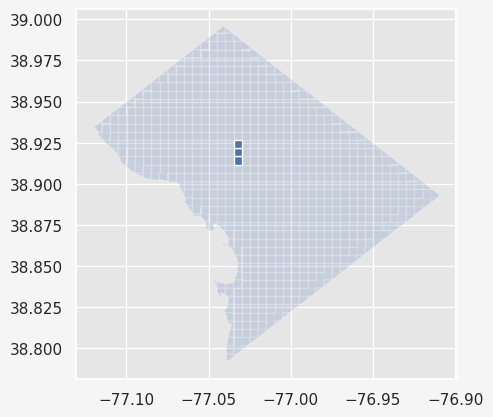

In [49]:
ax=nets.plot(alpha=0.2)
nets.iloc[309:312].plot(ax=ax)

# aggregate

In [50]:
def merge_into_nets(nets,geo_data, count_name='counts'):
    # find the net for each incident
    geo_data = gpd.sjoin(geo_data,nets, how='left', op='within')
    # group by the net
    counts=geo_data.groupby('index_right').size().rename(count_name)
    # merge the group count back to nets
    geo_data=nets.merge(counts, left_on='index', right_on='index_right', how='left')
    
    geo_data=geo_data.fillna(0)
    return geo_data

In [51]:
crime_net_agg=merge_into_nets(nets,crime_data.iloc[:,1:],count_name='all_crime_counts')
crime_net_agg=merge_into_nets(crime_net_agg,libraries,count_name='libraries')
crime_net_agg=merge_into_nets(crime_net_agg,atm,count_name='atm')
crime_net_agg=merge_into_nets(crime_net_agg,banks,count_name='banks')
crime_net_agg=merge_into_nets(crime_net_agg,gas,count_name='gas')
crime_net_agg=merge_into_nets(crime_net_agg,metro_stations,count_name='metro_stations')

crime_net_agg=merge_into_nets(crime_net_agg,parks,count_name='parks')
crime_net_agg=merge_into_nets(crime_net_agg,museums,count_name='museums')
crime_net_agg=merge_into_nets(crime_net_agg,police_stations,count_name='police_stations')
crime_net_agg=merge_into_nets(crime_net_agg,shopping_centers,count_name='shopping_centers')

crime_net_agg=merge_into_nets(crime_net_agg,theft_other.iloc[:,1:],count_name='theft_o')
crime_net_agg=merge_into_nets(crime_net_agg,theft_auto.iloc[:,1:],count_name='theft_auto')
crime_net_agg=merge_into_nets(crime_net_agg,theft_v.iloc[:,1:],count_name='theft_v')

crime_net_agg=merge_into_nets(crime_net_agg,robbery.iloc[:,1:],count_name='robbery')
crime_net_agg=merge_into_nets(crime_net_agg,assault.iloc[:,1:],count_name='assault')
crime_net_agg=merge_into_nets(crime_net_agg,burglary.iloc[:,1:],count_name='burglary')

crime_net_agg=merge_into_nets(crime_net_agg,homicide.iloc[:,1:],count_name='homicide')
crime_net_agg=merge_into_nets(crime_net_agg,sexabuse.iloc[:,1:],count_name='sexabuse')
crime_net_agg=merge_into_nets(crime_net_agg,arson.iloc[:,1:],count_name='arson')

crime_net_agg=merge_into_nets(crime_net_agg,gun.iloc[:,1:],count_name='gun')
crime_net_agg=merge_into_nets(crime_net_agg,knife.iloc[:,1:],count_name='knife')
crime_net_agg=merge_into_nets(crime_net_agg,methods_others.iloc[:,1:],count_name='methods_others')

crime_net_agg=merge_into_nets(crime_net_agg,camera,count_name='camera')
crime_net_agg=merge_into_nets(crime_net_agg,grocery,count_name='grocery')
crime_net_agg=merge_into_nets(crime_net_agg,metro_bus,count_name='metro_bus')
crime_net_agg=merge_into_nets(crime_net_agg,post_office,count_name='post_office')
crime_net_agg=merge_into_nets(crime_net_agg,schools,count_name='schools')
crime_net_agg=merge_into_nets(crime_net_agg,shuttle_bus,count_name='shuttle_bus')

crime_net_agg=merge_into_nets(crime_net_agg,crime_data.iloc[:,1:],count_name='day_of_week')
crime_net_agg=merge_into_nets(crime_net_agg,crime_data.iloc[:,1:],count_name='hour')

In [52]:
crime_net_agg

,geometry,index,all_crime_counts,libraries,atm,banks,gas,metro_stations,parks,museums,police_stations,shopping_centers,theft_o,theft_auto,theft_v,robbery,assault,burglary,homicide,sexabuse,arson,gun,knife,methods_others,camera,grocery,metro_bus,post_office,schools,shuttle_bus,day_of_week,hour
0,"MULTIPOLYGON (((-77.11481 38.92711, -77.11481 ...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"POLYGON ((-77.11979 38.93435, -77.11686 38.936...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"POLYGON ((-77.11480 38.93826, -77.11480 38.936...",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"POLYGON ((-77.10980 38.92239, -77.10982 38.922...",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"POLYGON ((-77.11438 38.92665, -77.11440 38.926...",4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,"POLYGON ((-76.91480 38.89734, -76.91480 38.896...",818,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,8.0,3.0,4.0,0.0,1.0,0.0,0.0,6.0,1.0,18.0,0.0,0.0,4.0,0.0,0.0,0.0,25.0,25.0
819,"POLYGON ((-76.91480 38.88853, -76.91480 38.891...",819,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
820,"POLYGON ((-76.90980 38.89344, -76.90980 38.892...",820,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,9.0,12.0,7.0,5.0,0.0,1.0,0.0,0.0,11.0,0.0,34.0,0.0,0.0,7.0,0.0,0.0,0.0,45.0,45.0
821,"POLYGON ((-76.91390 38.89664, -76.91480 38.896...",821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

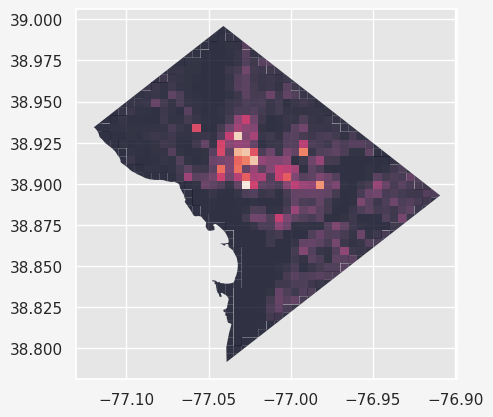

In [53]:
# dc_boundary.plot()
# plt.figure(figsize=((10,8)))
crime_net_agg.plot(column='all_crime_counts', edgecolor="none",  alpha=0.8)
# plt.show()

In [54]:
# have to think about how this work
kde=KernelDensity(kernel="gaussian", bandwidth=0.001)
kde.fit(jan_crimes[['PCA_location']])
z = kde.score_samples(jan_crimes[['PCA_location']])

0.44999336959699865


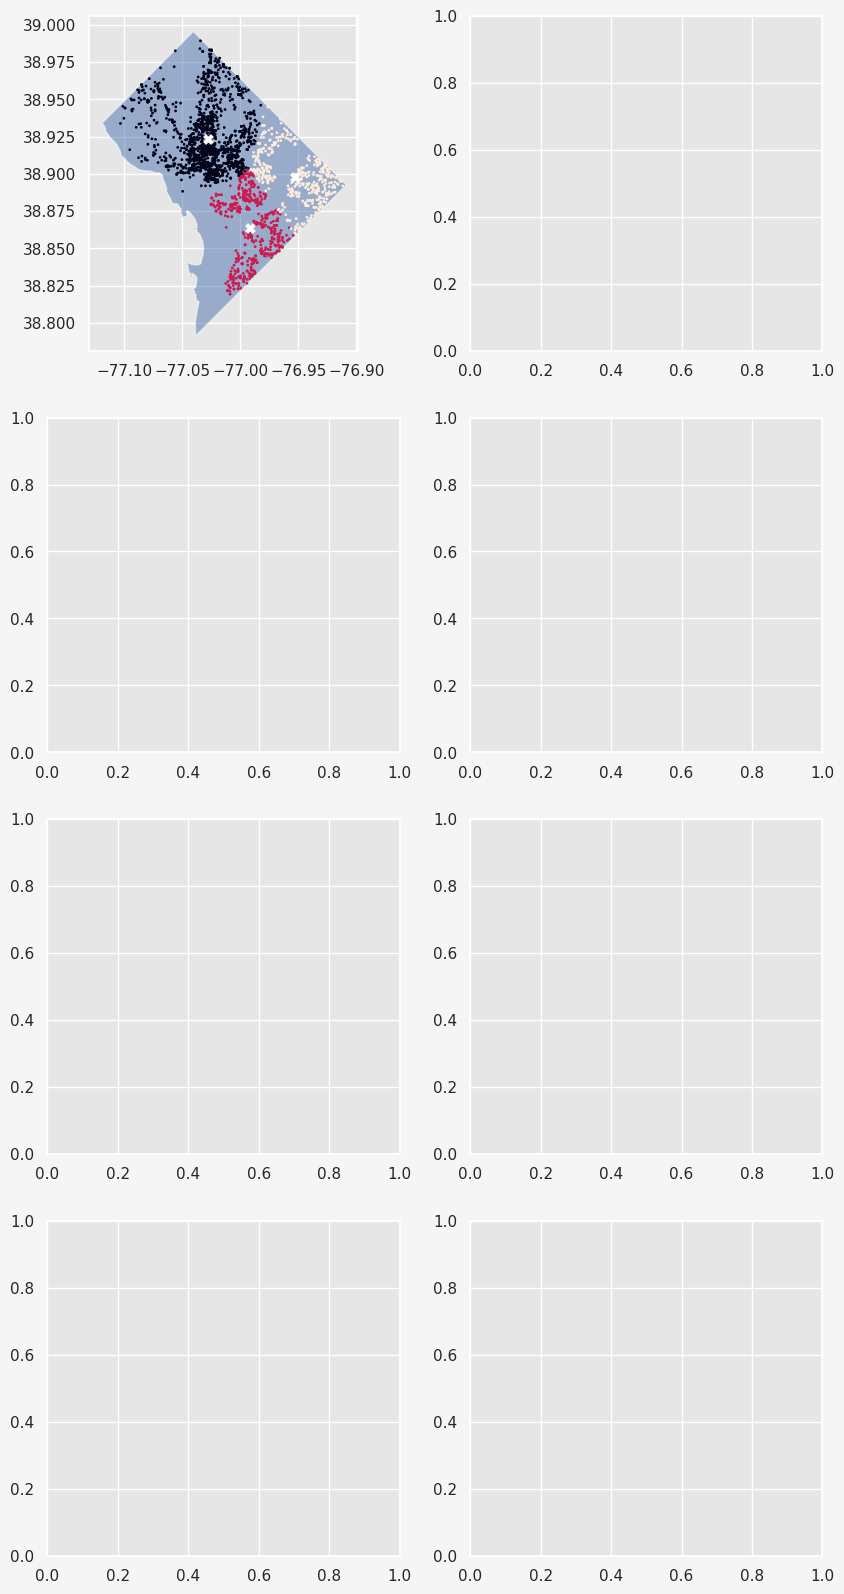

In [59]:
fig, axs = plt.subplots(4, 2, figsize=(10,20))
axs = np.ravel(axs)
from sklearn.metrics import silhouette_score
i=0
for cluster in [3]:
    estimator=KMeans(n_clusters=cluster)
    pred=estimator.fit_predict(jan_crimes[['longitude','latitude']])
    centroids=estimator.cluster_centers_
    score=silhouette_score(jan_crimes[['longitude','latitude']], pred)
    print(score)
    dc_boundary.plot(alpha=0.5,ax=axs[i])
    axs[i].scatter(jan_crimes['longitude'], jan_crimes['latitude'],c=estimator.labels_,s=1)
    axs[i].scatter(centroids[:,0], centroids[:,1], marker='X', s=50, linewidths=0.5,color='w')
    i=i+1


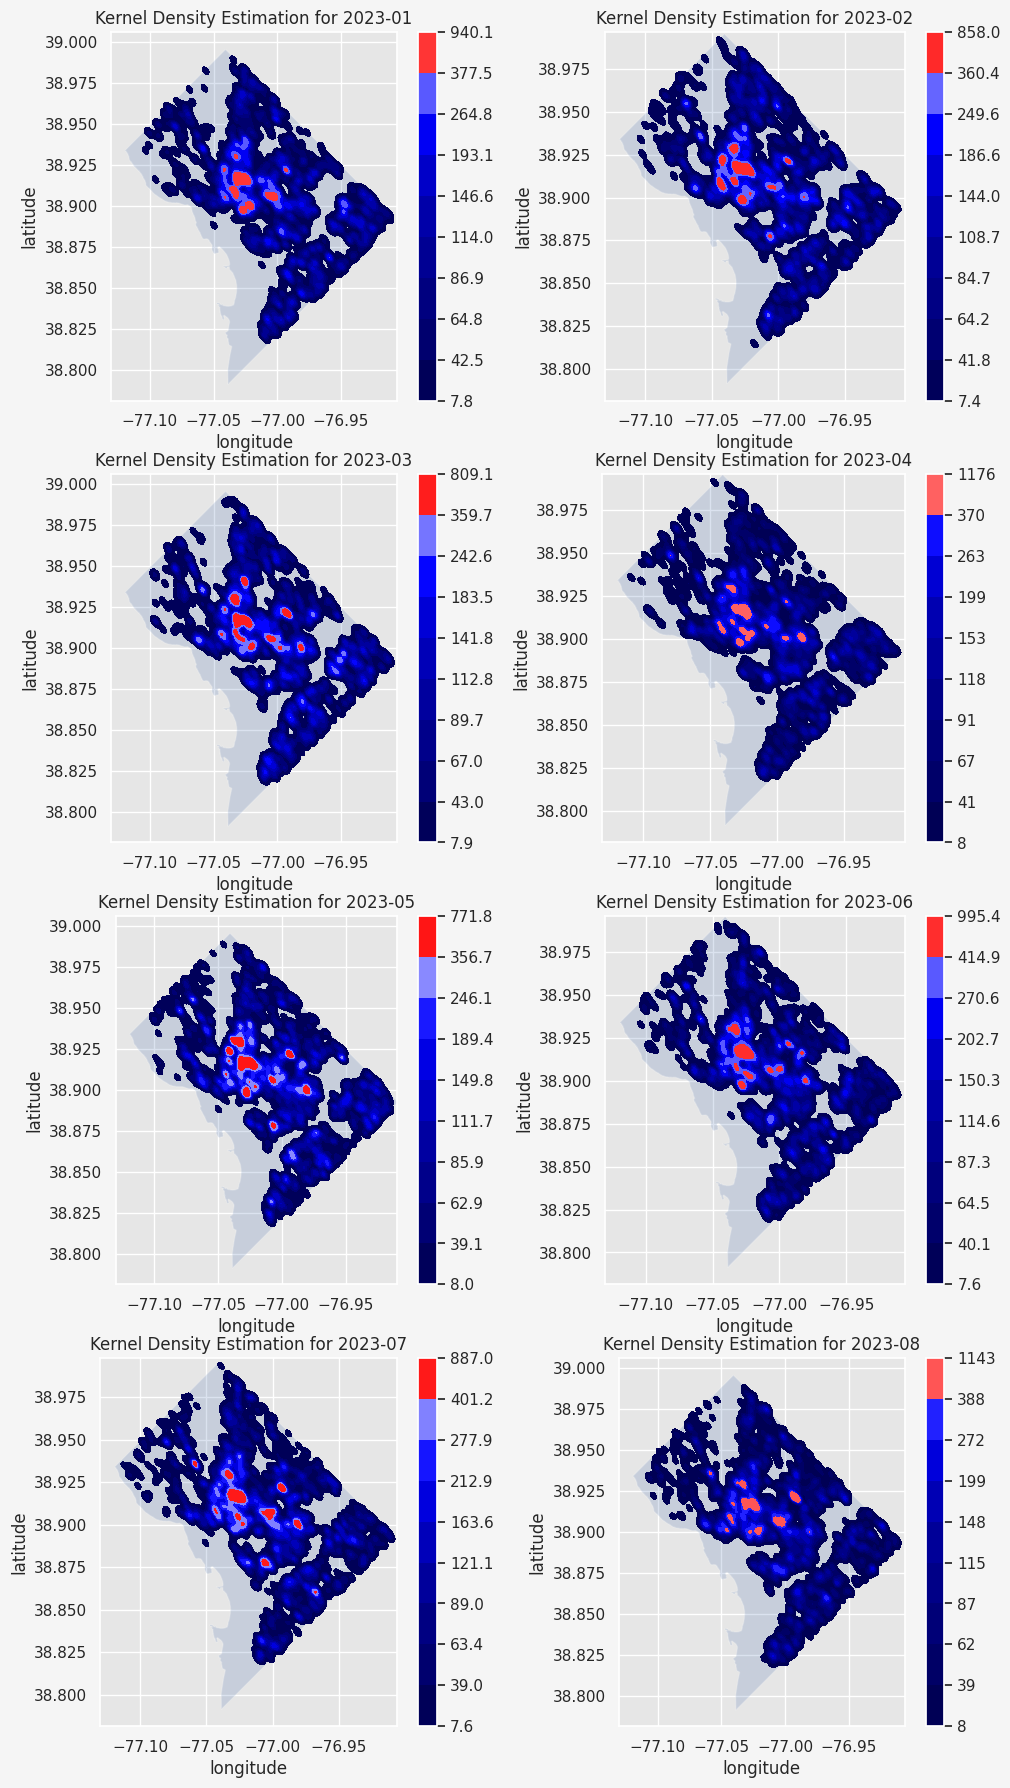

In [65]:
# plt.scatter(jan_crimes['longitude'], jan_crimes['latitude'],c=estimator.labels_,s=1)

import matplotlib.patches as  mpatches
fig, axs = plt.subplots(4, 2, figsize=(12,22))
axs = np.ravel(axs)

loc=0
for i in [1,2,3,4,5,6,7,8]:
# for i in [1,2]:
    monthly_crime_data=crime_data[crime_data['month']==f'2023-0{i}']
    dc_boundary.plot(alpha=0.2,ax=axs[loc])
    sns.kdeplot(data=monthly_crime_data,x='longitude', y ='latitude', 
                fill=True,bw_adjust=.2, cmap='seismic',thresh=0.01,cbar=True,ax=axs[loc])
#     handles = [mpatches.Patch(facecolor=plt.cm.seismic(100), label="Highest"),
#                mpatches.Patch(facecolor=plt.cm.seismic(0), label="Lowest")]
#     plt.legend(handles=handles)

    axs[loc].set_title(f'Kernel Density Estimation for 2023-0{i}')
    loc=loc+1
plt.savefig('./kde.png',dpi=300, bbox_inches='tight')

In [561]:
res=fishnet(polygon, 0.01)
nets=gpd.GeoDataFrame(geometry=res)
nets['index']=range(len(nets))

In [857]:
temp=gpd.sjoin(jan_crimes.iloc[:,1:], nets,how='left', op='within')
temp['date']=temp['start_date'].dt.round(freq='6h')
sel_temp=temp[['date','index','gas']]
pt=sel_temp.pivot_table(index='date',columns=['index'],aggfunc='count',values='gas',fill_value=0)

ts=nets
for id, row in pt.iterrows():
#     print(row)
    tt=nets.merge(row,left_on='index',right_on='index',how='left')
    ts[id]=tt.iloc[:,-1]
ts=ts.fillna(0)

In [858]:
ts.shape

(226, 375)

<Axes: >

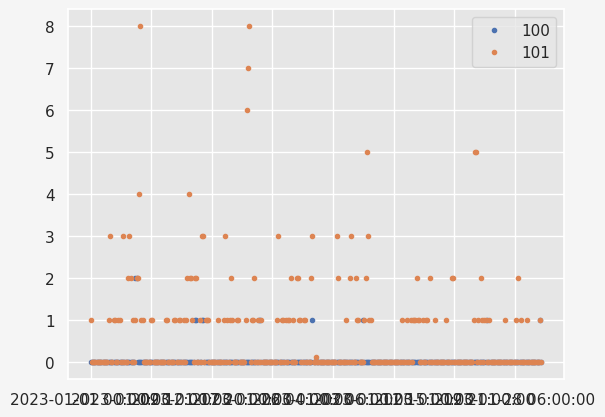

In [859]:
ts.iloc[100:102,2:].T.plot(style='.')

In [860]:
from statsmodels.tsa.stattools import kpss

In [566]:
ts_small=ts.iloc[100,3:]
stationary_test=kpss(ts_small, regression='c', nlags="auto")

/tmp/ipykernel_383972/2659440183.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stationary_test=kpss(ts_small, regression='c', nlags="auto")


In [567]:
print('KPSS test statistic: ', stationary_test) 
# based on the p-value, we can reject the null hypothesis; hence the data is non-stationary


KPSS test statistic:  (0.04539231969399565, 0.1, 0, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


## time series model

In [569]:
import torch

import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

In [861]:
# column 0 is geoinfo, column 1 is index, need to be removed
TRAIN_SIZE=150
SEQ=28

In [862]:
X=[]
y=[]
for i in range(ts.shape[1]-SEQ-2):
    i=i+2 # skip index and geo column
    X.append(ts.iloc[:,i:i+SEQ].values)
    y.append(ts.iloc[:,i+SEQ:i+SEQ+1].values)
    

In [863]:
X=np.array(X)
y=np.array(y)

In [864]:
X[-1].shape

(226, 28)

In [865]:
# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)
train_size=Y_train.shape[0]
test_size=Y_test.shape[0]

In [866]:
print(train_size)
print(test_size)

276
69


<Axes: >

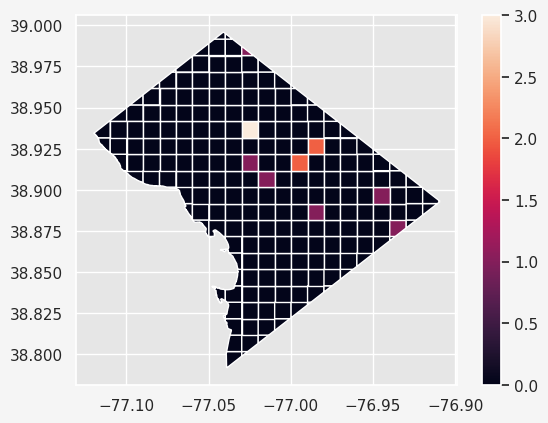

In [867]:
nets['y']=Y_test[0]
nets.plot(column='y',legend=True)

In [903]:
# transform to torch dataset
X_train = torch.from_numpy(X_train).float().unsqueeze(1)
Y_train = torch.from_numpy(Y_train).float().unsqueeze(1)
X_test = torch.from_numpy(X_test).float().unsqueeze(1)
Y_test = torch.from_numpy(Y_test).float().unsqueeze(1)
train_tensor = torch.utils.data.TensorDataset(X_train, Y_train) 
test_tensor = torch.utils.data.TensorDataset(X_test, Y_test) 
train_data_loader = torch.utils.data.DataLoader(train_tensor, batch_size=1,shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_tensor, batch_size=1,shuffle=False)

In [904]:
USE_DIFF=False
device = torch.device("cuda:1") if torch.cuda.is_available() else torch.device("cpu")
# Initialize the model
def train(model,train_loader,optimizer,crit):
    model.train()
    loss_all = 0
    for idx,data in enumerate(train_loader):
        data[0] = data[0].to(device)
        data[1] = data[1].to(device)
        
        optimizer.zero_grad()
        output = model(data[0]) #app_seq[batch,seq,4]  y_seq[batch*4,seq]
        # print(f'{output.shape}, {data[1].shape}')
        loss = crit(output, data[1])
        loss.backward()
        loss_all += loss.item()
        optimizer.step()
    return loss_all 

def test(model,test_loader,crit):
    model.eval()
    loss_all=0
    with torch.no_grad():
        pred=[]
        gt=[]
        x=test_tensor[0][0].unsqueeze(0).to(device) #1,1,823, SEQ
        # print(x.shape)
        for idx in range(len(test_tensor)):
            y=test_tensor[idx][1].to(device)
            temp=model(x)
            y_pred=temp.unsqueeze(0).detach().cpu().numpy()
            y_gt=y.cpu().numpy()
            if len(pred)==0:
                pred=y_pred
                gt=y_gt
            else:
                if USE_DIFF:
                    pred=np.concatenate((pred,y_pred+pred[-1]),axis=0)
                    gt=np.concatenate((gt,y_gt+gt[-1]),axis=0)
                else:
                    pred=np.concatenate((pred,y_pred),axis=0)
                    gt=np.concatenate((gt,y_gt),axis=0)
            loss = crit(temp, y)
            loss_all=loss_all+loss.item()
            
#             x[0][1:SEQ]=torch.clone(x[0][0:SEQ-1])
#             x[0][0]=temp
        loss_all=loss_all

    return loss_all,pred,gt



In [905]:
# create a graph
edge_index_start=[]
edge_index_end=[]

for idx_i in range(ts.shape[0]):
    net1=ts.iloc[idx_i,0]
    for idx_j in range(idx_i+1, ts.shape[0]):
        net2=ts.iloc[idx_j,0]
        if net1.dwithin(net2, 0.001):
            edge_index_start.append(idx_i)
            edge_index_end.append(idx_j)
            edge_index_start.append(idx_j)
            edge_index_end.append(idx_i)
    
edge_index=torch.cat((torch.tensor(edge_index_start).reshape(-1,1),torch.tensor
                      (edge_index_end).reshape(-1,1)),dim=1).long()
edge_index=edge_index.t().contiguous().to(device)


In [901]:
# try the adjust settings CNN 
from torch_geometric.nn import GCNConv, SAGEConv,GATConv
x=torch.randn(1,226,SEQ)
channel_1, channel_2 = 3,3

# conv1 = SAGEConv(SEQ, SEQ)
# x=conv1(x,edge_index)
# print('1', x.shape)

lstm = nn.LSTM(1,4,1)
x=x.squeeze(0).unsqueeze(-1)
print(x.shape)
x,_=lstm(x)

print('2',x.shape)

# fc=nn.Linear(SEQ,1)
# x=fc(x)
# print('3', x.shape)

torch.Size([226, 28, 1])
2 torch.Size([226, 28, 4])


In [918]:
class BaseModel(torch.nn.Module):
#     torch.Size([128, 1, 226, 28]) input training batch 128
    def __init__(self) -> None:
        super().__init__()
        hs=64
        self.lstm=nn.LSTM(1, hs, 1, batch_first=True)
        self.gnn=SAGEConv(hs, hs)
        self.fc=nn.Linear(hs, 1)
        
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        print('1', x.shape)
        x=x.squeeze(0).squeeze(0).unsqueeze(-1)
        print('2', x.shape)
        x,_ =self.lstm(x)
        x=self.dropout(F.relu(x))
        x=self.dropout(F.relu(self.gnn(x, edge_index)))
        x=self.fc(x)
        print('3', x.shape)
        return x

In [920]:
MODEL_NAME='base'
model=BaseModel().to(device)
print(sum(p.numel() for p in model.parameters() if p.requires_grad))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) 
# initialize the loss function using mean squared error
crit=nn.MSELoss()
history=[]
test_history=[]
best_validate_mae = np.inf
validate_score_non_decrease_count = 0
best_epoch=0
for epoch in range(1):
    loss=train(model,train_data_loader,optimizer,crit)
    history.append(loss)
#      progress monitor:
    if (epoch+1) % 10==0:
        print(f'{epoch:3d} -- train loss: {loss:.8f}')
        
print('test')
test_loss,pred,gt=test(model,test_data_loader,crit)
print(f'test loss: {test_loss:.8f}')

# plot
plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
plt.plot(pred[:,0,1,0], label='predicted', color='red')
plt.plot(gt[:,100], label='real', color='blue',alpha=0.5)
plt.legend(loc='best')
plt.title(f'Predicted vs Real {MODEL_NAME},SEQ={SEQ}, test loss: {test_loss:.4f}')
plt.show()
# plt.savefig(f'./pred_vs_real_diff_{MODEL_NAME}.png')
plt.plot(history[2:],c='r')
plt.show()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

Text(0.5, 1.0, 'PRED')

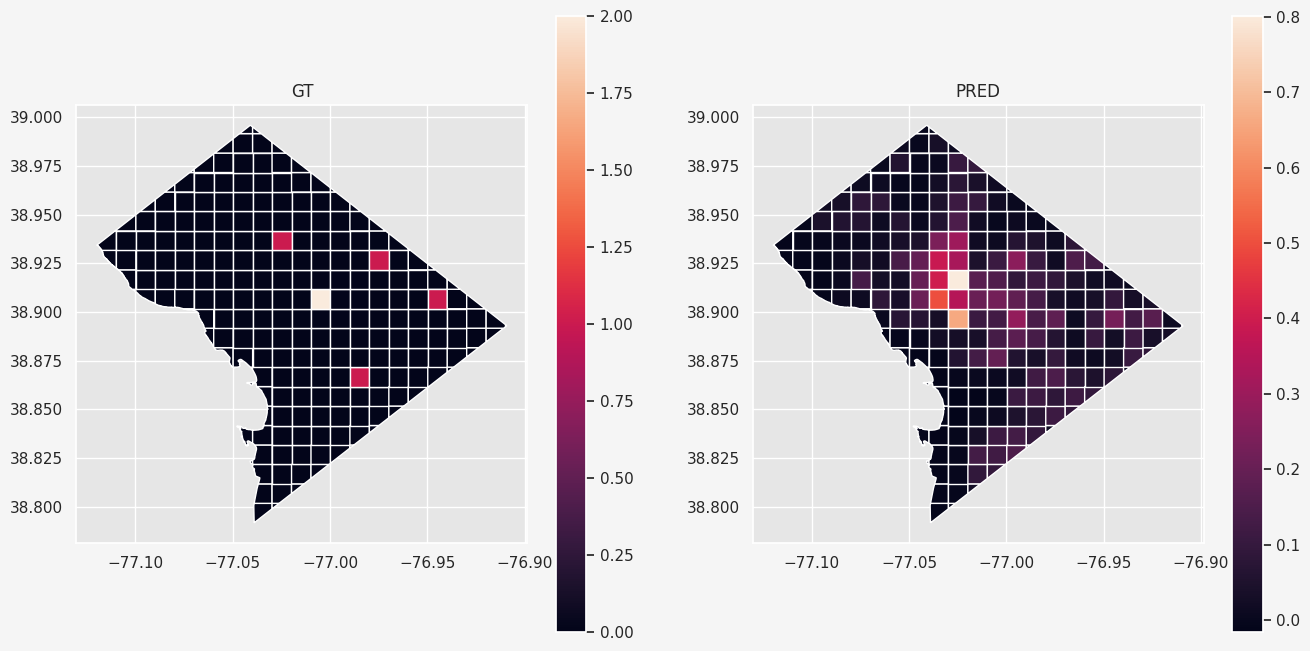

In [875]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs = np.ravel(axs)
sel_idx=2
nets['y']=gt[sel_idx,:]
nets.plot(column='y',legend=True, ax=axs[0])

nets['y']=pred[sel_idx,0,:]
nets.plot(column='y',legend=True, ax=axs[1])

axs[0].set_title('GT')
axs[1].set_title('PRED')

Text(0.5, 1.0, 'PRED')

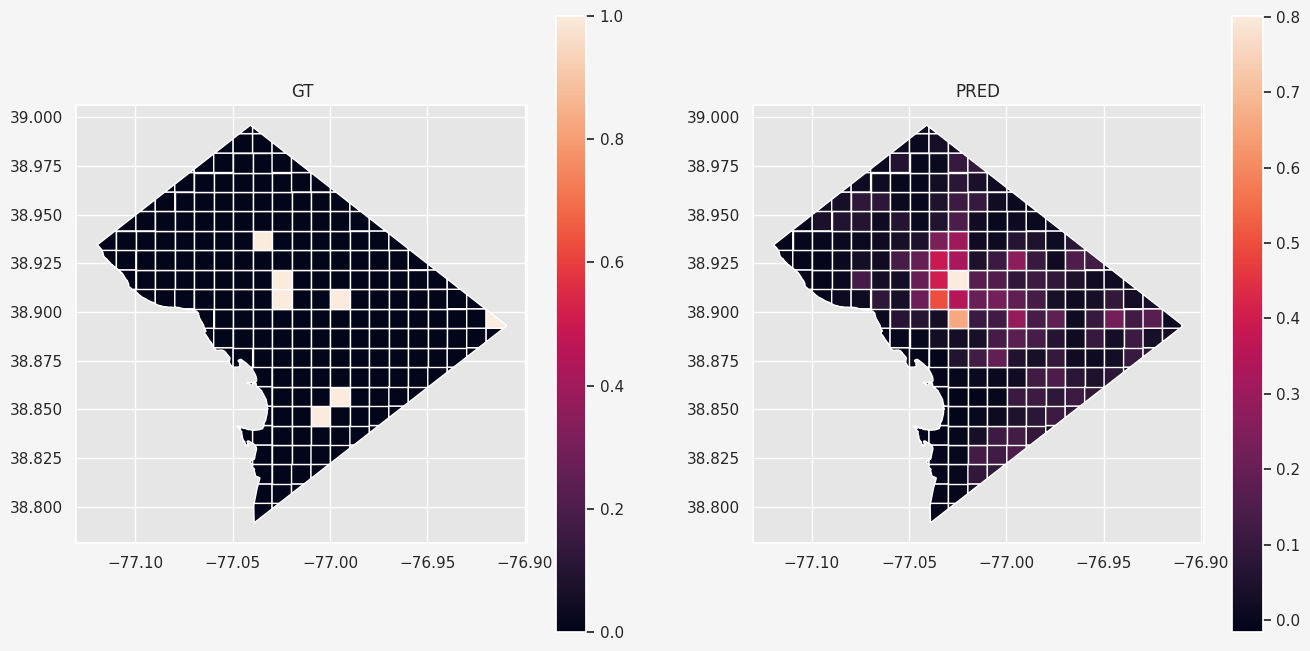

In [876]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs = np.ravel(axs)
sel_idx=3
nets['y']=gt[sel_idx,:]
nets.plot(column='y',legend=True, ax=axs[0])

nets['y']=pred[sel_idx,0,:]
nets.plot(column='y',legend=True, ax=axs[1])

axs[0].set_title('GT')
axs[1].set_title('PRED')

In [935]:
t=torch.tensor([[1,2,3],[11,22,33]])

In [936]:
t.shape

torch.Size([2, 3])

In [939]:
t1=t.flatten(1)
t1.shape

torch.Size([2, 3])

In [932]:
t1=t1.unsqueeze(1)
t1.shape

torch.Size([6, 1])

In [933]:
t1

tensor([[ 1],
        [ 2],
        [ 3],
        [11],
        [22],
        [33]])

In [934]:
t1.reshape(2,3)

tensor([[ 1,  2,  3],
        [11, 22, 33]])